#  Python pour les big data 
   ## Introduction 

Bitcoin is a digital currency that operates on a decentralized network, known as the blockchain. It was created in 2009 by an anonymous individual or group of individuals using the pseudonym Satoshi Nakamoto. Bitcoin transactions are recorded on the blockchain, which is a public ledger that keeps track of every transaction that has ever occurred on the network. This makes bitcoin an ideal candidate for Big Data analysis, as there is a wealth of data available on every transaction.

The study of Bitcoin using Big Data can be approached in many different ways. One possible area of research is to analyze the transactional data to identify patterns and trends in the use of Bitcoin. This could include looking at the volume of transactions over time, the geographical distribution of Bitcoin usage, and the types of goods and services that are being purchased with Bitcoin.

Another potential avenue of study is to examine the network structure of Bitcoin. This could involve analyzing the connections between different nodes on the network, as well as the overall topology of the network. This information could be used to better understand the dynamics of the Bitcoin ecosystem, including the behavior of miners, traders, and other participants.

Finally, Big Data techniques could be applied to the study of Bitcoin as a financial asset. This could include analyzing price data to identify patterns and trends, as well as using machine learning algorithms to predict future price movements. By studying Bitcoin in this way, researchers can gain valuable insights into the underlying factors that drive its value and the potential risks and opportunities associated with investing in this emerging asset class.

In this Project, we will attempt to look at, in basic form, the different correlation between each data entry and try to better understand bitcoin and it's various properties.

In [33]:
import os
import datetime as dt
import pandas as pd
import numpy as np
from matplotlib import pylab as plt
from sklearn.linear_model import LinearRegression
import plotly.graph_objs as go


In [8]:
df = pd.read_csv("timeseries/external.csv", sep=",", index_col="date")
df = df.drop("Unnamed: 0", axis=1)
df.index.names = ["Date"]
df

,PriceUSD,HashRate
Date,,
2015-01-02,315.942732,3.333450e+05
2015-01-03,285.647310,3.272842e+05
2015-01-04,263.334575,3.474869e+05
2015-01-05,275.003852,3.151626e+05
2015-01-06,287.549521,3.192031e+05
...,...,...
2017-06-26,2426.365051,5.023770e+06
2017-06-27,2530.345536,4.634604e+06
2017-06-28,2562.792264,5.554450e+06


<Axes: xlabel='Date'>

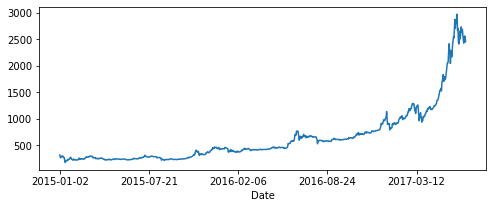

In [9]:
df.PriceUSD.plot(figsize=(8, 3))

<Axes: xlabel='Date'>

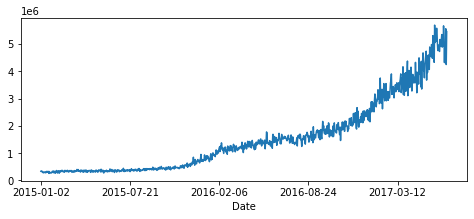

In [10]:
df.HashRate.plot(figsize=(8, 3))

In [11]:
# Printing correlations between variables
df.corr()

,PriceUSD,HashRate
PriceUSD,1.000000,0.937447
HashRate,0.937447,1.000000


In [12]:
df = df.reset_index()
df["Date"] = pd.to_datetime(df["Date"]).map(dt.datetime.toordinal)

y = 1.5963403784515047 * x + -1174364.2202138337


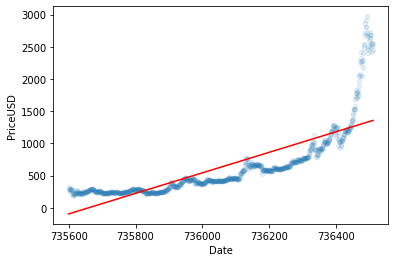

In [13]:
# Creating a Linear Regression model on our data
lin = LinearRegression()
lin.fit(df[["Date"]], df["PriceUSD"])

# Creating a plot
ax = df.plot.scatter(x="Date", y="PriceUSD", alpha=.1)
ax.plot(df["Date"], lin.predict(df[["Date"]]), c='r')

# Printing linear function from our regression
print("y = " + str(lin.coef_[0]) + " * x + " + str(lin.intercept_))

           3         2
9.578e-06 x - 21.15 x + 1.556e+07 x - 3.817e+12


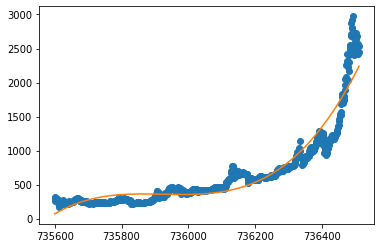

In [14]:
# Creating a Polynomial regression model from our data
fit = np.polyfit(df["Date"], df["PriceUSD"], 3)
fit1d = np.poly1d(fit)
print(fit1d)

# Creating a plot
plt.plot(df["Date"], df["PriceUSD"], 'o', label='Original data')
plt.plot(df["Date"], fit1d(df["Date"]), label='Fitted curve')

In [15]:
# Reconversion - Date column to index and datetime values
df = df.set_index("Date")
df.index = df.index.map(dt.datetime.fromordinal)

# Import global.csv into df2
df2 = pd.read_csv("timeseries/global.csv", sep=",", index_col="Unnamed: 0")
df2.index.names = ["Date"]
df2.index = pd.to_datetime(df2.index)

# Merge between df (external.csv) and df2 (global.csv)
df = df.merge(df2, how="inner", on="Date")
df.rename(columns = {'PriceUSD':'price_usd', 'HashRate':'hash_rate'}, inplace = True)
df

,price_usd,hash_rate,year,month,day,total_fee,total_received_satoshi,total_sent_satoshi,mean_fee_satoshi,mean_feeUSD,...,nb_transactions,nb_payments,mean_nb_inputs,mean_nb_outputs,nb_mining,total_mining_satoshi,newly_created_coins,self_spent_satoshi,total_received,volume_without_self
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-02,315.942732,3.333450e+05,2015,1,2,1159934218,73370568521080,72955568521080,14978.682808,4.732406e+06,...,77439,257633,2.715557,3.326915,166,416159934218,415000000000,4316724676318,73370568521080,69053843844762
2015-01-03,285.647310,3.272842e+05,2015,1,3,1196476043,82635189454578,82220189454578,14304.385766,4.086009e+06,...,83644,295618,2.781885,3.534240,166,416196476043,415000000000,5584584356557,82635189454578,77050605098021
2015-01-04,263.334575,3.474869e+05,2015,1,4,2159195328,115159442449532,114726942449532,25138.199015,6.619757e+06,...,85893,280288,2.770133,3.263223,173,434659195328,432500000000,6554587956125,115159442449532,108604854493407
2015-01-05,275.003852,3.151626e+05,2015,1,5,1608443040,112439228285641,112051728285641,16955.609622,4.662858e+06,...,94862,286552,2.954471,3.020725,155,389108443040,387500000000,5063695492444,112439228285641,107375532793197
2015-01-06,287.549521,3.192031e+05,2015,1,6,1296373032,118260758863552,117868258863552,14667.176159,4.217540e+06,...,88386,252571,2.869595,2.857591,157,393796373032,392500000000,4026430543611,118260758863552,114234328319941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-06-26,2426.365051,5.023770e+06,2017,6,26,35993152232,375012739382430,374842739382430,145080.443192,3.520181e+08,...,248091,626222,2.565329,2.524163,136,205993152232,170000000000,14151200557043,375012739382430,360861538825387
2017-06-27,2530.345536,4.634604e+06,2017,6,27,38384859820,287624055555912,287452805555912,142346.452989,3.601857e+08,...,269658,747924,2.314862,2.773602,137,209634859820,171250000000,19821969138631,287624055555912,267802086417281
2017-06-28,2562.792264,5.554450e+06,2017,6,28,38663204682,282904720130478,282717220130478,140744.451983,3.606988e+08,...,274705,686018,2.471178,2.497290,150,226163204682,187500000000,10958737629631,282904720130478,271945982500847


correlation : nb_transactions and price_usd = 0.7009060681375398


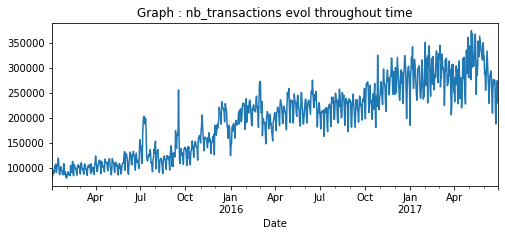

In [16]:
#Function to print correlation between col1 and col2, and their graphs if needed
def print_graph_corr(col1 : str, col2 : str, printGraph1 : bool, printGraph2 : bool) :
    if printGraph1 :
        df[col1].plot(title="Graph : " + col1 + " evol throughout time", figsize=(8, 3))
    
    if printGraph2 :
        df[col2].plot(title="Graph : " + col2 + " evol throughout time", figsize=(8, 3))

    print("correlation : " + col1 + " and " + col2 + " = " + str(df[col1].corr(df[col2])))

#Between nb_transaction and price_usd
print_graph_corr("nb_transactions", "price_usd", True, False)

correlation : nb_payments and price_usd = 0.5259850058477298


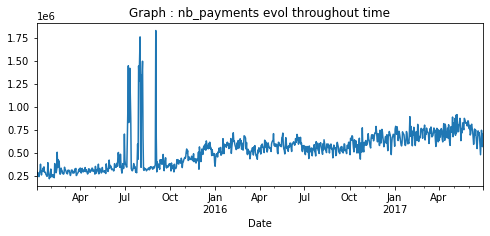

In [17]:
#Between nb_payments and price_usd
print_graph_corr("nb_payments", "price_usd", True, False)

In [18]:
#Between nb_transactions and nb_payments
print_graph_corr("nb_payments", "nb_transactions", False, False)

correlation : nb_payments and nb_transactions = 0.75442506270734


correlation : price_usd and newly_created_coins = -0.6392996477389676


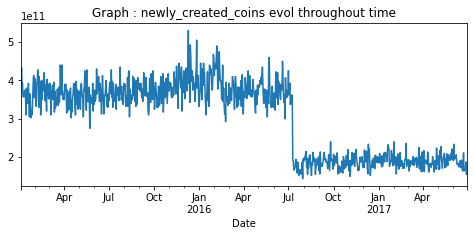

In [19]:
#Between price_usd and newly_created_coins
print_graph_corr("price_usd", "newly_created_coins", False, True)

Now lets do this for every property in our table:

In [37]:
list_of_correlations = []
for col1 in df:
    for col2 in df:
        
        print_graph_corr(col1,col2,False,False)
        list_of_correlations.append((df[col1].corr(df[col2]),(col1,col2)))
        
#print(list_of_correlations)

correlation : price_usd and price_usd = 0.9999999999999998
correlation : price_usd and hash_rate = 0.9374466899233476
correlation : price_usd and year = 0.7876602721473689
correlation : price_usd and month = -0.0569733912518553
correlation : price_usd and day = 0.021652930451027643
correlation : price_usd and total_fee = 0.9516748677947203
correlation : price_usd and total_received_satoshi = 0.09756850965979516
correlation : price_usd and total_sent_satoshi = 0.09778767437689756
correlation : price_usd and mean_fee_satoshi = 0.9515701688144629
correlation : price_usd and mean_feeUSD = 0.9375200481965106
correlation : price_usd and mean_fee_for100 = 0.2186201950920349
correlation : price_usd and nb_transactions = 0.7009060681375399
correlation : price_usd and nb_payments = 0.5259850058477299
correlation : price_usd and mean_nb_inputs = -0.38414361260697366
correlation : price_usd and mean_nb_outputs = -0.2385918816515364
correlation : price_usd and nb_mining = 0.06542562794527566
correl

correlation : total_mining_satoshi and total_received = 0.036940843848342134
correlation : total_mining_satoshi and volume_without_self = 0.04079557931756244
correlation : newly_created_coins and price_usd = -0.6392996477389676
correlation : newly_created_coins and hash_rate = -0.7231538104321035
correlation : newly_created_coins and year = -0.7065342085510827
correlation : newly_created_coins and month = -0.11794882121354222
correlation : newly_created_coins and day = -0.049767502689097375
correlation : newly_created_coins and total_fee = -0.5849785348142527
correlation : newly_created_coins and total_received_satoshi = 0.023044791968544493
correlation : newly_created_coins and total_sent_satoshi = 0.022703344649324764
correlation : newly_created_coins and mean_fee_satoshi = -0.564747357261684
correlation : newly_created_coins and mean_feeUSD = -0.44682200334793565
correlation : newly_created_coins and mean_fee_for100 = -0.1001948193464605
correlation : newly_created_coins and nb_tran

In [29]:
#Turns out that there is a lib func for calculation all the corroloation and storing them in a Matrix
sorted_list = sorted(list_of_correlations, key=lambda x: x[0])
sorted_list
# Create a correlation matrix
corr_matrix = df.corr()
corr_matrix.style.background_gradient(cmap='coolwarm')

# Print the correlation matrix
print(corr_matrix)


                        price_usd  hash_rate      year     month       day   
price_usd                1.000000   0.937447  0.787660 -0.056973  0.021653  \
hash_rate                0.937447   1.000000  0.914395 -0.106731  0.025523   
year                     0.787660   0.914395  1.000000 -0.285986 -0.005827   
month                   -0.056973  -0.106731 -0.285986  1.000000  0.007689   
day                      0.021653   0.025523 -0.005827  0.007689  1.000000   
total_fee                0.951675   0.909859  0.749550 -0.097611  0.027023   
total_received_satoshi   0.097569   0.112789  0.181758 -0.087468  0.034609   
total_sent_satoshi       0.097788   0.113037  0.182001 -0.087428  0.034626   
mean_fee_satoshi         0.951570   0.884613  0.711172 -0.095197  0.037035   
mean_feeUSD              0.937520   0.794962  0.582998 -0.070545  0.024519   
mean_fee_for100          0.218620   0.184963  0.107912  0.062479 -0.015174   
nb_transactions          0.700906   0.828416  0.869806  0.046060

In [28]:
# Sort the correlation matrix by the most interesting correlations
sorted_corr = corr_matrix.unstack().sort_values(kind="quicksort").drop_duplicates()

# Print the sorted correlation matrix
print(sorted_corr)

newly_created_coins  hash_rate                -0.723154
                     year                     -0.706534
nb_transactions      newly_created_coins      -0.668322
year                 total_mining_satoshi     -0.664620
hash_rate            total_mining_satoshi     -0.663786
                                                 ...   
total_sent_satoshi   volume_without_self       0.999406
total_received       volume_without_self       0.999407
total_sent_satoshi   total_received_satoshi    1.000000
                     total_received            1.000000
price_usd            price_usd                 1.000000
Length: 201, dtype: float64


We get the following heatmpa of correlation

In [38]:
heatmap = go.Heatmap(
    z=corr_matrix.values,
    x=corr_matrix.columns,
    y=corr_matrix.columns,
    colorscale='RdBu',
)

# Specify the layout of the plot
layout = go.Layout(
    title='Correlation Matrix Heatmap',
    xaxis=dict(title='Variables'),
    yaxis=dict(title='Variables'),
)

# Create a figure object
figure = go.Figure(data=[heatmap], layout=layout)

# Show the plot
figure.show()


## Comment
The correlation matrix provided shows the correlation coefficients between the variables in the dataset.

A correlation coefficient is a measure of the strength and direction of the linear relationship between two variables. The values range from -1 to 1, where -1 indicates a perfect negative correlation, 0 indicates no correlation, and 1 indicates a perfect positive correlation.

Looking at the matrix, we can see that price_usd has a strong positive correlation with hash_rate, year, total_fee, mean_fee_satoshi, and mean_feeUSD. This means that as these variables increase, the price of bitcoin also tends to increase. On the other hand, there is a weak negative correlation between price_usd and month, meaning that as the month increases, the price of bitcoin tends to decrease slightly.

So in the late year the price of bitcoin tends to dip, but from year to year to price tends to increase. Of course this is limited the relatively short time frame between 2015-01-02 2015 and 2017-06-30 so the sample size for years is 3 and for months it's 30, not large enough to be conclusive.

Overall, the correlation matrix provides insights into the relationships between variables in the dataset, and can help identify potential areas of further investigation.

### Volatility
Now lets look at how volatile BTC, knowing that cryptocurrently are notoriously volatile assets, it would be interesting to see how it compares to other assets such as gold or an S&P500 stock.

To study the volatility of the price of Bitcoin in the provided DataFrame, we can calculate the daily percentage change in the price and then calculate the standard deviation of those changes. This will give us a measure of the volatility of the price of Bitcoin over time.

In [50]:
df['pct_change'] = df['price_usd'].pct_change()


# calculate the standard deviation of the daily percentage changes
volatility = df['pct_change'].std()

print("BTC volatility: {:.2f}%".format(volatility * 100))


BTC volatility: 3.36%


Volatility of our btc is around 3% daily, which is quite high, lets compare with gold.
Here we use a database and the closing price as a 

In [48]:
# load the gold price data
gold_df = pd.read_csv('timeseries/gold.csv', parse_dates=['Date'])

# calculate daily returns
gold_df['Daily_Returns'] = gold_df['Close'].pct_change()

# calculate the annualized volatility
#gold_volatility = np.std(gold_df['Daily_Returns']) * np.sqrt(252)

gold_volatility = gold_df['Daily_Returns'].std()

print("Gold volatility: {:.2f}%".format(gold_volatility * 100))



Gold volatility: 1.10%


We therefore have a higher volality for BTC (2015-2017) than for Gold (over the past 20 years), so that's considering the recent inflation aswell.